## Opis:

W poniższym projekcie wykorzystano dane dotyczące wypadków z Nowego Yorku.
Projekt ma na celu podstawową analizę powyższych danych, przestawienie informacji o wypadkach ze wskazaniem śmiertelności oraz liczby rannych a także wskazanie domniemanych przyczyn.  
Dane zostały wyczyszczone oraz przekształcone przy użyciu bilbioteki Pandas.
Wykorzystując biblioteki Pandas oraz Matplotlib przygotowano tabele oraz wykresy prezentujące poniższe informacje: 
- lista głównych przyczyn wypadków,
- lista typów pojazdów biorących udział w wypadkach,
- informacje o wypadkach w dzielnicach,
- liczba rannych oraz liczba wypadków śmiertelnych w ujęciu miesięcznym,
- zestawienie procentowe rannych w ujęciu miesięcznym,
- rozkład ilości wypadków w ciągu dnia.

## Biblioteki + ustawienia:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', 50)

## Dane:

In [3]:
csv_file = 'nypd-motor-vehicle-collisions.csv'

columns_to_use = ['ACCIDENT DATE', 'ACCIDENT TIME', 'BOROUGH',
        'NUMBER OF PERSONS INJURED', 'NUMBER OF PERSONS KILLED',
        'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF PEDESTRIANS KILLED',
        'NUMBER OF CYCLIST INJURED', 'NUMBER OF CYCLIST KILLED',
        'NUMBER OF MOTORIST INJURED', 'NUMBER OF MOTORIST KILLED',
        'CONTRIBUTING FACTOR VEHICLE 1',
        'COLLISION_ID', 'VEHICLE TYPE CODE 1']

df = pd.read_csv(csv_file, usecols=columns_to_use)

In [4]:
df.head(5)

,ACCIDENT DATE,ACCIDENT TIME,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1
0,2019-08-05T00:00:00.000,16:30,QUEENS,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,4184637,Sedan
1,2019-08-27T00:00:00.000,16:02,BROOKLYN,0.0,0.0,0,0,0,0,0,0,Passing Too Closely,4195773,Station Wagon/Sport Utility Vehicle
2,2019-08-15T00:00:00.000,17:57,MANHATTAN,1.0,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,4202457,Sedan
3,2019-08-30T00:00:00.000,21:53,BRONX,0.0,0.0,0,0,0,0,0,0,Unspecified,4198749,Taxi
4,2019-08-06T00:00:00.000,9:45,MANHATTAN,1.0,0.0,0,0,1,0,0,0,Driver Inattention/Distraction,4183798,Station Wagon/Sport Utility Vehicle


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1612178 entries, 0 to 1612177
Data columns (total 14 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   ACCIDENT DATE                  1612178 non-null  object 
 1   ACCIDENT TIME                  1612178 non-null  object 
 2   BOROUGH                        1127553 non-null  object 
 3   NUMBER OF PERSONS INJURED      1612161 non-null  float64
 4   NUMBER OF PERSONS KILLED       1612145 non-null  float64
 5   NUMBER OF PEDESTRIANS INJURED  1612178 non-null  int64  
 6   NUMBER OF PEDESTRIANS KILLED   1612178 non-null  int64  
 7   NUMBER OF CYCLIST INJURED      1612178 non-null  int64  
 8   NUMBER OF CYCLIST KILLED       1612178 non-null  int64  
 9   NUMBER OF MOTORIST INJURED     1612178 non-null  int64  
 10  NUMBER OF MOTORIST KILLED      1612178 non-null  int64  
 11  CONTRIBUTING FACTOR VEHICLE 1  1607854 non-null  object 
 12  COLLISION_ID  

# Czyszczenie i modyfikacja danych:

In [6]:
df.drop_duplicates(inplace=True)
df.drop_duplicates(subset='COLLISION_ID', inplace=True)

In [7]:
df['BOROUGH'] = df['BOROUGH'].fillna('Missing BOROUGH')

In [8]:
df.dropna(inplace=True)

## Dodanie kolumny DateTime:

In [9]:
def create_datetime_column(new_column_name: str = 'ACCIDENT DATE AND TIME',
                           date_column_name: str = 'ACCIDENT DATE',
                           time_column_name: str = 'ACCIDENT TIME',
                           data: pd.DataFrame = df) -> pd.DataFrame:
    if new_column_name in data.columns:
        print(f'Kolumna {new_column_name} już istnieje.')
    
    else:
        data[date_column_name] = data[date_column_name].apply(lambda x: x.split('T')[0])
        data[date_column_name] = data[date_column_name] + data[time_column_name]
        data[date_column_name] = pd.to_datetime(data[date_column_name], format='%Y-%m-%d%H:%M')
        data.rename(columns={date_column_name: new_column_name}, inplace=True)
        print(f'Dodano kolumnę {new_column_name}.')

create_datetime_column()

Dodano kolumnę ACCIDENT DATE AND TIME.


## Dodanie dnia tygodnia i miesiąca

In [10]:
def create_weekday_column(new_column_name: str = 'WEEKDAY',
                          date_time_column_name: str = 'ACCIDENT DATE AND TIME',
                          column_name_to_rename: str = 'ACCIDENT TIME',
                          data: pd.DataFrame = df) -> pd.DataFrame:
    if new_column_name in data.columns:
        print(f'Kolumna {new_column_name} już istnieje.')
    else:
        data.rename(columns={column_name_to_rename: new_column_name}, inplace=True)
        data[new_column_name] = data[date_time_column_name].dt.dayofweek
        data[new_column_name].map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
                                   4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
        print(f'Dodano kolumnę {new_column_name}.')


create_weekday_column()

Dodano kolumnę WEEKDAY.


In [11]:
def create_month_column(new_column_name: str = 'MONTH',
                        date_time_column_name: str = 'ACCIDENT DATE AND TIME',
                        data: pd.DataFrame = df) -> pd.DataFrame:
    if new_column_name in data.columns:
        print(f'Kolumna {new_column_name} już istnieje.')

    else:
        month = data[date_time_column_name].dt.month
        data.insert(2, new_column_name, month)
        print(f'Dodano kolumnę {new_column_name}.')


create_month_column()

Dodano kolumnę MONTH.


## Sprawdzenie sum rannych i zabitych:

In [12]:
def check_injured_sums(column_with_sum: str = 'NUMBER OF PERSONS INJURED',
                       injured_type_one: str = 'NUMBER OF CYCLIST INJURED',
                       injured_type_two: str = 'NUMBER OF CYCLIST INJURED',
                       injured_type_three: str = 'NUMBER OF MOTORIST INJURED',
                       data: pd.DataFrame = df) -> pd.DataFrame:
    df_with_incorrect = data[(data[column_with_sum]==data[injured_type_one]+data[injured_type_two]+data[injured_type_three])==False]
    if len(df_with_incorrect) == 0:
        print('Dane rannych się zgadzają.')
    else:
        data[column_with_sum] = data[injured_type_one]+data[injured_type_two]+data[injured_type_three]
        print('Dane poprawiono.')
check_injured_sums()

Dane poprawiono.


In [13]:
def check_killed_sums(column_with_sum: str = 'NUMBER OF PERSONS KILLED',
                      injured_type_one: str = 'NUMBER OF CYCLIST KILLED',
                      injured_type_two: str = 'NUMBER OF CYCLIST KILLED',
                      injured_type_three: str = 'NUMBER OF MOTORIST KILLED',
                      data: pd.DataFrame = df) -> pd.DataFrame:
    df_with_incorrect = data[(data[column_with_sum]==data[injured_type_one]+data[injured_type_two]+data[injured_type_three])==False]
    if len(df_with_incorrect) == 0:
        print('Dane zabitych się zgadzają.')
    else:
        data[column_with_sum] = data[injured_type_one]+data[injured_type_two]+data[injured_type_three]
        print('Dane poprawiono.')
check_injured_sums()

Dane rannych się zgadzają.


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1211802 entries, 0 to 1612019
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype         
---  ------                         --------------    -----         
 0   ACCIDENT DATE AND TIME         1211802 non-null  datetime64[ns]
 1   WEEKDAY                        1211802 non-null  int64         
 2   MONTH                          1211802 non-null  int64         
 3   BOROUGH                        1211802 non-null  object        
 4   NUMBER OF PERSONS INJURED      1211802 non-null  int64         
 5   NUMBER OF PERSONS KILLED       1211802 non-null  float64       
 6   NUMBER OF PEDESTRIANS INJURED  1211802 non-null  int64         
 7   NUMBER OF PEDESTRIANS KILLED   1211802 non-null  int64         
 8   NUMBER OF CYCLIST INJURED      1211802 non-null  int64         
 9   NUMBER OF CYCLIST KILLED       1211802 non-null  int64         
 10  NUMBER OF MOTORIST INJURED     1211802 non-null  int64

In [15]:
df.head(5)

,ACCIDENT DATE AND TIME,WEEKDAY,MONTH,BOROUGH,NUMBER OF PERSONS INJURED,NUMBER OF PERSONS KILLED,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,NUMBER OF MOTORIST INJURED,NUMBER OF MOTORIST KILLED,CONTRIBUTING FACTOR VEHICLE 1,COLLISION_ID,VEHICLE TYPE CODE 1
0,2019-08-05 16:30:00,0,8,QUEENS,0,0.0,0,0,0,0,0,0,Passing Too Closely,4184637,Sedan
1,2019-08-27 16:02:00,1,8,BROOKLYN,0,0.0,0,0,0,0,0,0,Passing Too Closely,4195773,Station Wagon/Sport Utility Vehicle
2,2019-08-15 17:57:00,3,8,MANHATTAN,1,0.0,0,0,0,0,1,0,Driver Inattention/Distraction,4202457,Sedan
3,2019-08-30 21:53:00,4,8,BRONX,0,0.0,0,0,0,0,0,0,Unspecified,4198749,Taxi
4,2019-08-06 09:45:00,1,8,MANHATTAN,2,0.0,0,0,1,0,0,0,Driver Inattention/Distraction,4183798,Station Wagon/Sport Utility Vehicle


# Prezentacja danych

## 20 najczęstszych przyczyn wypadków:

In [16]:
def df_with_top_x_factors(column_with_factors: str = 'CONTRIBUTING FACTOR VEHICLE 1',
                          rows_to_show=20,
                          data: pd.DataFrame = df) -> pd.DataFrame:
    factors_sum = data[column_with_factors].value_counts()
    factors_sum = pd.DataFrame(factors_sum)
    factors_sum.reset_index(inplace=True)
    factors_without_unspecified = factors_sum.drop(0)
    factors_without_unspecified.rename(columns={'index': 'Contributing Factor',
                                                'CONTRIBUTING FACTOR VEHICLE 1': 'Sum of accidents'},inplace=True)
    return factors_without_unspecified.head(rows_to_show)


df_with_top_x_factors()

,Contributing Factor,Sum of accidents
1,Driver Inattention/Distraction,229284
2,Failure to Yield Right-of-Way,69519
3,Following Too Closely,61925
4,Backing Unsafely,46737
5,Other Vehicular,38707
6,Fatigued/Drowsy,35092
7,Turning Improperly,31253
8,Passing or Lane Usage Improper,29485
9,Passing Too Closely,26929
10,Unsafe Lane Changing,23758


## 10 typów pojazdów najczęściej biorących udział w wypadkach:

In [17]:
def df_with_top_x_vehicles(column_with_vehicle_type: str = 'VEHICLE TYPE CODE 1',
                           rows_to_show=20,
                           data: pd.DataFrame = df) -> pd.DataFrame:
    cars_sum = data[column_with_vehicle_type].value_counts()
    cars_sum = pd.DataFrame(cars_sum)
    cars_sum.reset_index(inplace=True)
    cars_sum.rename(columns={'index': 'Vehicle Type:',
                             'VEHICLE TYPE CODE 1': 'Sum of accidents:'}, inplace=True)
    cars_sum.index += 1
    return cars_sum.head(rows_to_show)


df_with_top_x_vehicles(rows_to_show=10)

,Vehicle Type:,Sum of accidents:
1,PASSENGER VEHICLE,524930
2,SPORT UTILITY / STATION WAGON,237777
3,Sedan,126814
4,Station Wagon/Sport Utility Vehicle,103094
5,TAXI,38511
6,VAN,19251
7,PICK-UP TRUCK,17539
8,OTHER,17401
9,UNKNOWN,14714
10,Taxi,13155


## Dane poszczególnych dzielnic

In [18]:
def df_with_borough_split(borough_column_name: str = 'BOROUGH',
                          killed_sum_column_name: str = 'NUMBER OF PERSONS KILLED',
                          injured_sum_column_name: str = 'NUMBER OF PERSONS INJURED',
                          value_to_drop: str = 'Missing BOROUGH',
                          data: pd.DataFrame = df) -> pd.DataFrame:
    df_borough_accidents_sum = data[borough_column_name].value_counts()
    df_borough_accidents_sum.rename("All Accidents:",inplace=True)
    
    df_killed_grouped = data.groupby(borough_column_name).agg({killed_sum_column_name: ['sum', 'max']})
    df_killed_grouped.columns = ['Sum of killed:', 'Most killed in 1 accident:']
    
    df_injured_grouped = data.groupby(borough_column_name).agg({injured_sum_column_name: ['sum', 'max']})
    df_injured_grouped.columns = ['Sum of injured:', 'Most injured in 1 accident:']
    
    merged_borough_df = df_injured_grouped.merge(df_killed_grouped,
                                                 left_on=borough_column_name,
                                                 right_on= borough_column_name)    
    merged_borough_df = merged_borough_df.merge(df_borough_accidents_sum,
                                               left_index=True,
                                               right_index=True)        
    merged_borough_df['Accidents with injured:'] = (merged_borough_df['Sum of injured:'] 
                                                   / merged_borough_df['All Accidents:']) * 100
    merged_borough_df['Accidents with injured:'] = merged_borough_df['Accidents with injured:'].round(decimals = 2)
    merged_borough_df['Accidents with injured:'] = merged_borough_df['Accidents with injured:'].astype(str) + '%'
    
    merged_borough_df.drop(value_to_drop, inplace=True)
    merged_borough_df = merged_borough_df[['All Accidents:', 'Accidents with injured:','Sum of injured:', 'Most injured in 1 accident:',
                                           'Sum of killed:', 'Most killed in 1 accident:']]

    return merged_borough_df
    
df_with_borough_split()



,All Accidents:,Accidents with injured:,Sum of injured:,Most injured in 1 accident:,Sum of killed:,Most killed in 1 accident:
BRONX,117947,23.44%,27651,31,120.0,2.0
BROOKLYN,261780,25.7%,67284,24,292.0,3.0
MANHATTAN,201735,14.52%,29288,17,171.0,8.0
QUEENS,224619,22.94%,51530,16,275.0,5.0
STATEN ISLAND,36592,22.0%,8050,17,52.0,2.0


In [19]:
print('Największa liczba wypadków miała miejsce w dzielnicy Brooklyn.\nW co 4 wypadku w tej dzielnicy są jacyś ranni.')

Największa liczba wypadków miała miejsce w dzielnicy Brooklyn.
W co 4 wypadku w tej dzielnicy są jacyś ranni.


## Liczba rannych w ujęciu miesięcznym:

In [20]:
def comment_about_injured_for_bar_plot(injured_in_accident_column_name: str = 'NUMBER OF PERSONS INJURED',
                                       data: pd.DataFrame = df) -> pd.DataFrame:
    count_of_accidents_with_injured = len(data[data[injured_in_accident_column_name] > 0])
    count_of_all_accidents = len(data[injured_in_accident_column_name])
    sum_of_all_injured = data[injured_in_accident_column_name].sum()
    injured_percentage = (count_of_accidents_with_injured / count_of_all_accidents) * 100
    print(
        f'W {count_of_accidents_with_injured} wypadkach (z całkowitej liczby {count_of_all_accidents}) byli jacyś ranni.'
        f'\nStanowi to {round(injured_percentage, 2)}% wypadków.\n'
        f'W sumie było {sum_of_all_injured} rannych.')

Liczba wypadków z osobami rannymi w ujęciu miesięcznym:


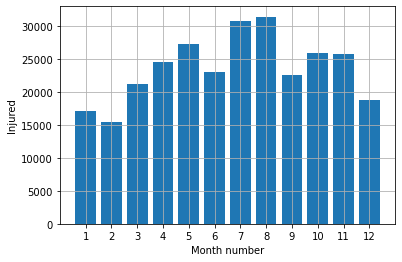

W 176907 wypadkach (z całkowitej liczby 1211802) byli jacyś ranni.
Stanowi to 14.6% wypadków.
W sumie było 283788 rannych.


In [21]:
def injured_in_month_pltbar_with_comment(months_column_name: str = 'MONTH',
                                         injured_in_accident_column_name: str = 'NUMBER OF PERSONS INJURED',
                                         data: pd.DataFrame = df) -> plt.bar:
    months = data[months_column_name].unique()
    months = sorted(months)
    injured_grouped_by_month = data.groupby([months_column_name]).sum()[injured_in_accident_column_name]

    plt.bar(months, injured_grouped_by_month)
    plt.xticks(months)
    plt.grid()
    plt.ylabel('Injured')
    plt.xlabel('Month number')

    print('Liczba wypadków z osobami rannymi w ujęciu miesięcznym:')
    plt.show()
    comment_about_injured_for_bar_plot()
    

injured_in_month_pltbar_with_comment()

 ## Śmiertelność w ujęciu miesięcznym:

In [22]:
def comment_about_killed_for_bar_plot(killed_in_accident_column_name: str = 'NUMBER OF PERSONS KILLED',
                                      data: pd.DataFrame = df) -> pd.DataFrame:
    count_of_accidents_with_killed = len(data[data[killed_in_accident_column_name] > 0])
    count_of_all_accidents = len(data[killed_in_accident_column_name])
    sum_of_all_killed = data[killed_in_accident_column_name].sum().astype('int')
    killed_percentage = (count_of_accidents_with_killed / count_of_all_accidents) * 100
    print(
        f'W {count_of_accidents_with_killed} wypadkach (z całkowitej liczby {count_of_all_accidents}) były ofiary śmiertelne.\n'
        f'Stanowi to {round(killed_percentage, 2)}%.\n'
        f'W sumie było {sum_of_all_killed} ofiar śmiertelnych.')

Ilość śmiertelnych wypdaków w ujęciu miesięcznym:


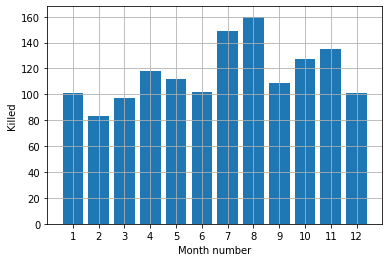

W 1336 wypadkach (z całkowitej liczby 1211802) były ofiary śmiertelne.
Stanowi to 0.11%.
W sumie było 1394 ofiar śmiertelnych.


In [23]:
def killed_in_month_pltbar_with_comment(months_column_name: str = 'MONTH',
                                        killed_in_accident_column_name: str = 'NUMBER OF PERSONS KILLED',
                                        data: pd.DataFrame = df) -> plt.bar:
    months = data[months_column_name].unique()
    months = sorted(months)
    killed_grouped_by_month = data.groupby([months_column_name]).sum()[killed_in_accident_column_name]

    plt.bar(months, killed_grouped_by_month)
    plt.xticks(months)
    plt.grid()
    plt.ylabel('Killed')
    plt.xlabel('Month number')

    print('Ilość śmiertelnych wypdaków w ujęciu miesięcznym:')
    plt.show()
    comment_about_killed_for_bar_plot()


killed_in_month_pltbar_with_comment()

## Zestawienie procentowe rannych w ujęciu miesięcznym: 

Całkowita liczba rannych: 283788
Rozkład procentowy w ujęciu miesięcznym:


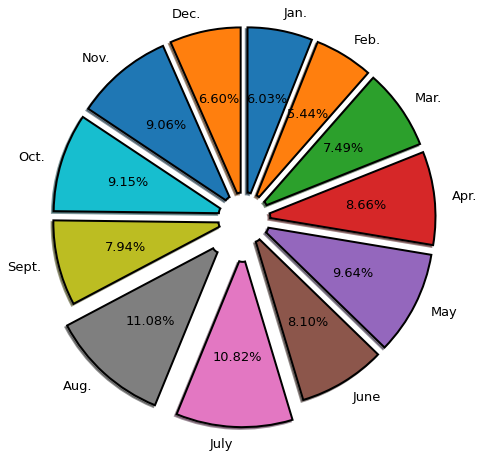

Powyższe dane wskazują wzrost liczby wypadków (oraz rannych i zmarłym w wypadkach) przypadający na Lipiec oraz Sierpień.
Może to być spowodowane szczytem sezonu turystycznego/wakacyjnego.


In [24]:
def monthly_injured_distribution(months_column_name: str = 'MONTH',
                                injured_in_accident_column_name: str = 'NUMBER OF PERSONS INJURED',
                                data: pd.DataFrame = df) ->plt.pie:
    months = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']
    injured_grouped_by_month = data.groupby([months_column_name]).sum()[injured_in_accident_column_name]
    explode = [0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, 0.2, 0.2]
    plt.pie(injured_grouped_by_month,
            labels=months,
            explode=explode,
            autopct="%0.2f%%",
            shadow=True,
            radius=2,
            startangle=90,
            textprops={"fontsize": 13},
            wedgeprops={"linewidth": 2, 'width': 1.9, "edgecolor": "k"},
            counterclock=False, )

    # show + komentarz
    print(f'Całkowita liczba rannych: {data[injured_in_accident_column_name].sum()}')
    print("Rozkład procentowy w ujęciu miesięcznym:")
    plt.show()
    print('Powyższe dane wskazują wzrost liczby wypadków (oraz rannych i zmarłym w wypadkach) przypadający na Lipiec oraz Sierpień.'
          '\nMoże to być spowodowane szczytem sezonu turystycznego/wakacyjnego.')

monthly_injured_distribution()

## Dobowy rozkład wypadków:

Rozkład dobowy wypadków:


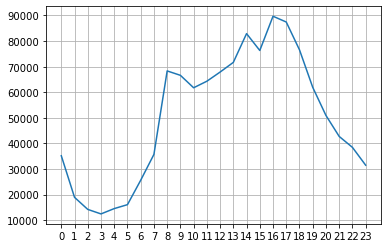

Powyższe dane wskazuja, że liczba wypadków znacząco wzrasta wraz z rozpoczęciem standardowych godzin pracy - 8:00,
osiągając maksimum przy godzinach szczytu związanych z koniecem pracy - 16:00.


In [25]:
def hourly_distribution_of_accidents(date_time_column_name: str = 'ACCIDENT DATE AND TIME',
                                     data: pd.DataFrame = df) -> plt.grid:
    accident_time = data[date_time_column_name].dt.hour

    plt.plot(range(0, 24), accident_time.value_counts(sort=False, ascending=True, ).sort_index())
    plt.xticks(range(0, 24))
    plt.grid()

    print('Rozkład dobowy wypadków:')
    plt.show()
    print('Powyższe dane wskazuja, że liczba wypadków znacząco wzrasta wraz z rozpoczęciem standardowych godzin pracy - 8:00,\n' 
          'osiągając maksimum przy godzinach szczytu związanych z koniecem pracy - 16:00.')


hourly_distribution_of_accidents()